In [6]:
%cd "/home/dutta/Downloads/Isochrones_prt"

/home/dutta/Downloads/Isochrones_prt


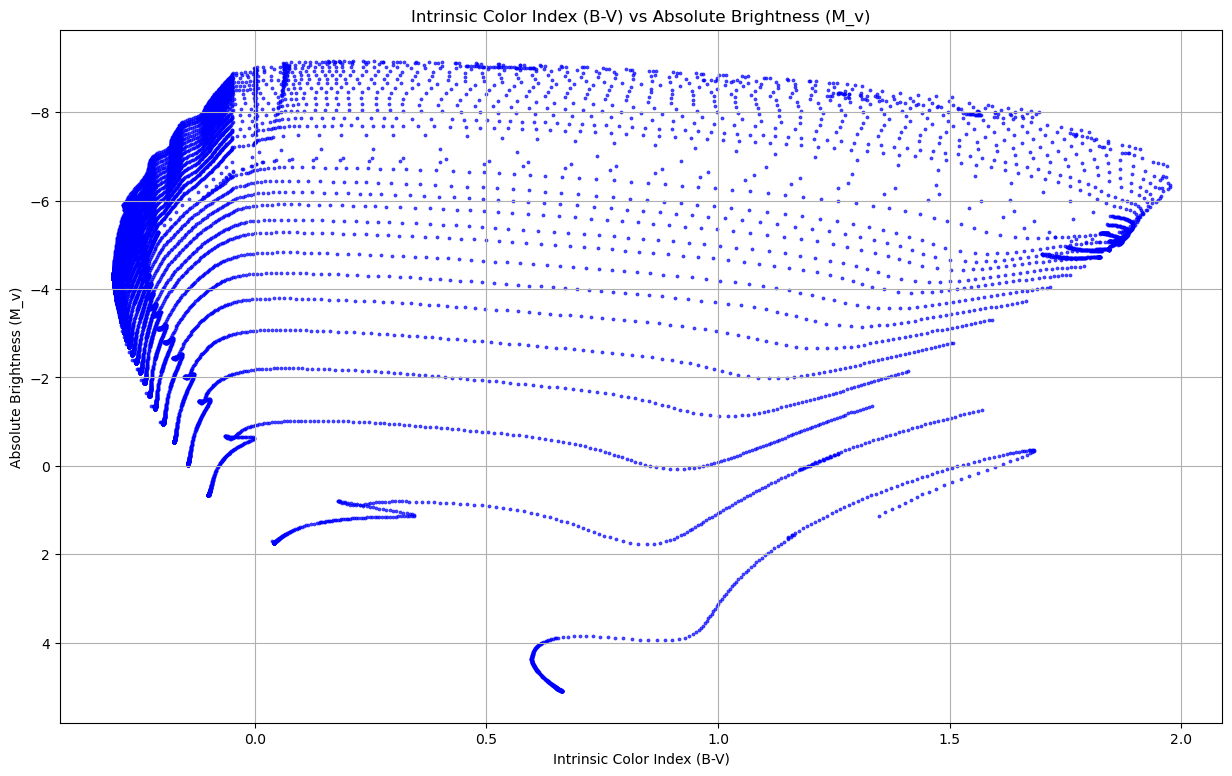

In [10]:
import os
import glob
import matplotlib.pyplot as plt

# Function to process a single .prt file
def process_prt_file(file_path):
    gaia_ids = []
    intrinsic_color_indices = []
    absolute_brightnesses = []
    with open(file_path, 'r') as f:
        for line in f:
            # Split the line into columns
            columns = line.strip().split()
            # Convert GAIA ID to string, and keep the other values as floats
            gaia_id = columns[0]
            intrinsic_color_index = float(columns[1])
            absolute_brightness = float(columns[2])
            # Append the processed data to the lists
            gaia_ids.append(gaia_id)
            intrinsic_color_indices.append(intrinsic_color_index)
            absolute_brightnesses.append(absolute_brightness)
    return gaia_ids, intrinsic_color_indices, absolute_brightnesses

# Main function to process all .prt files in the directory
def process_all_prt_files(directory):
    all_gaia_ids = []
    all_intrinsic_color_indices = []
    all_absolute_brightnesses = []
    # Find all .prt files in the given directory
    prt_files = glob.glob(os.path.join(directory, '*.prt'))
    for prt_file in prt_files:
        gaia_ids, intrinsic_color_indices, absolute_brightnesses = process_prt_file(prt_file)
        all_gaia_ids.extend(gaia_ids)
        all_intrinsic_color_indices.extend(intrinsic_color_indices)
        all_absolute_brightnesses.extend(absolute_brightnesses)
    return all_gaia_ids, all_intrinsic_color_indices, all_absolute_brightnesses

# Define the directory containing the .prt files
input_directory = '.'  # Change this to your directory

# Process all .prt files
gaia_ids, intrinsic_color_indices, absolute_brightnesses = process_all_prt_files(input_directory)

# Plot the data
plt.figure(figsize=(15, 9))
plt.scatter(intrinsic_color_indices, absolute_brightnesses, c='blue', marker='o', s=5, alpha=0.7, linewidth=0.5)
plt.title('Intrinsic Color Index (B-V) vs Absolute Brightness (M_v)')
plt.xlabel('Intrinsic Color Index (B-V)')
plt.ylabel('Absolute Brightness (M_v)')
plt.gca().invert_yaxis()  # Invert the y-axis to match astronomical convention
plt.grid(True)
plt.show()